In [1]:
#we use logastic regression when the dataset is the classification \
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 


In [2]:
df=pd.read_csv('titanic-training-data.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

<AxesSubplot:xlabel='Survived', ylabel='count'>

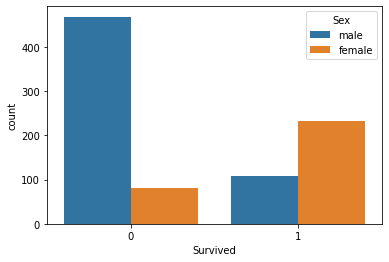

In [8]:
import seaborn as sns
sns.countplot(x="Survived",hue="Sex",data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

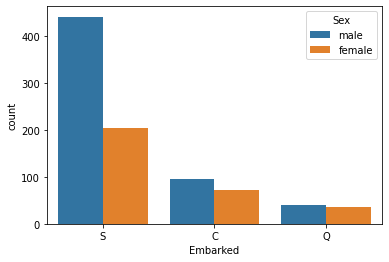

In [9]:
sns.countplot(x="Embarked",hue="Sex",data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

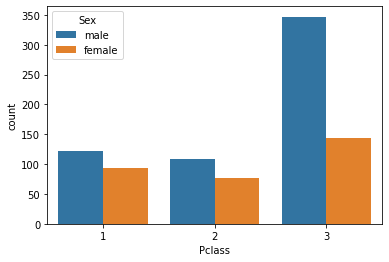

In [10]:
sns.countplot(x="Pclass",hue="Sex",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

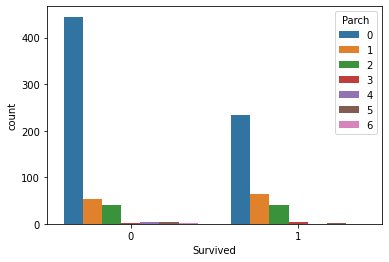

In [11]:
sns.countplot(x="Survived",hue="Parch",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

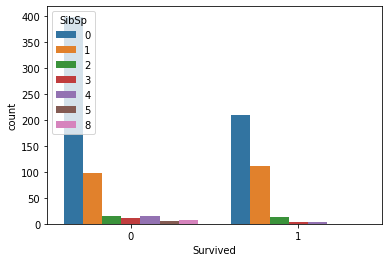

In [12]:
sns.countplot(x="Survived",hue="SibSp",data=df)

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

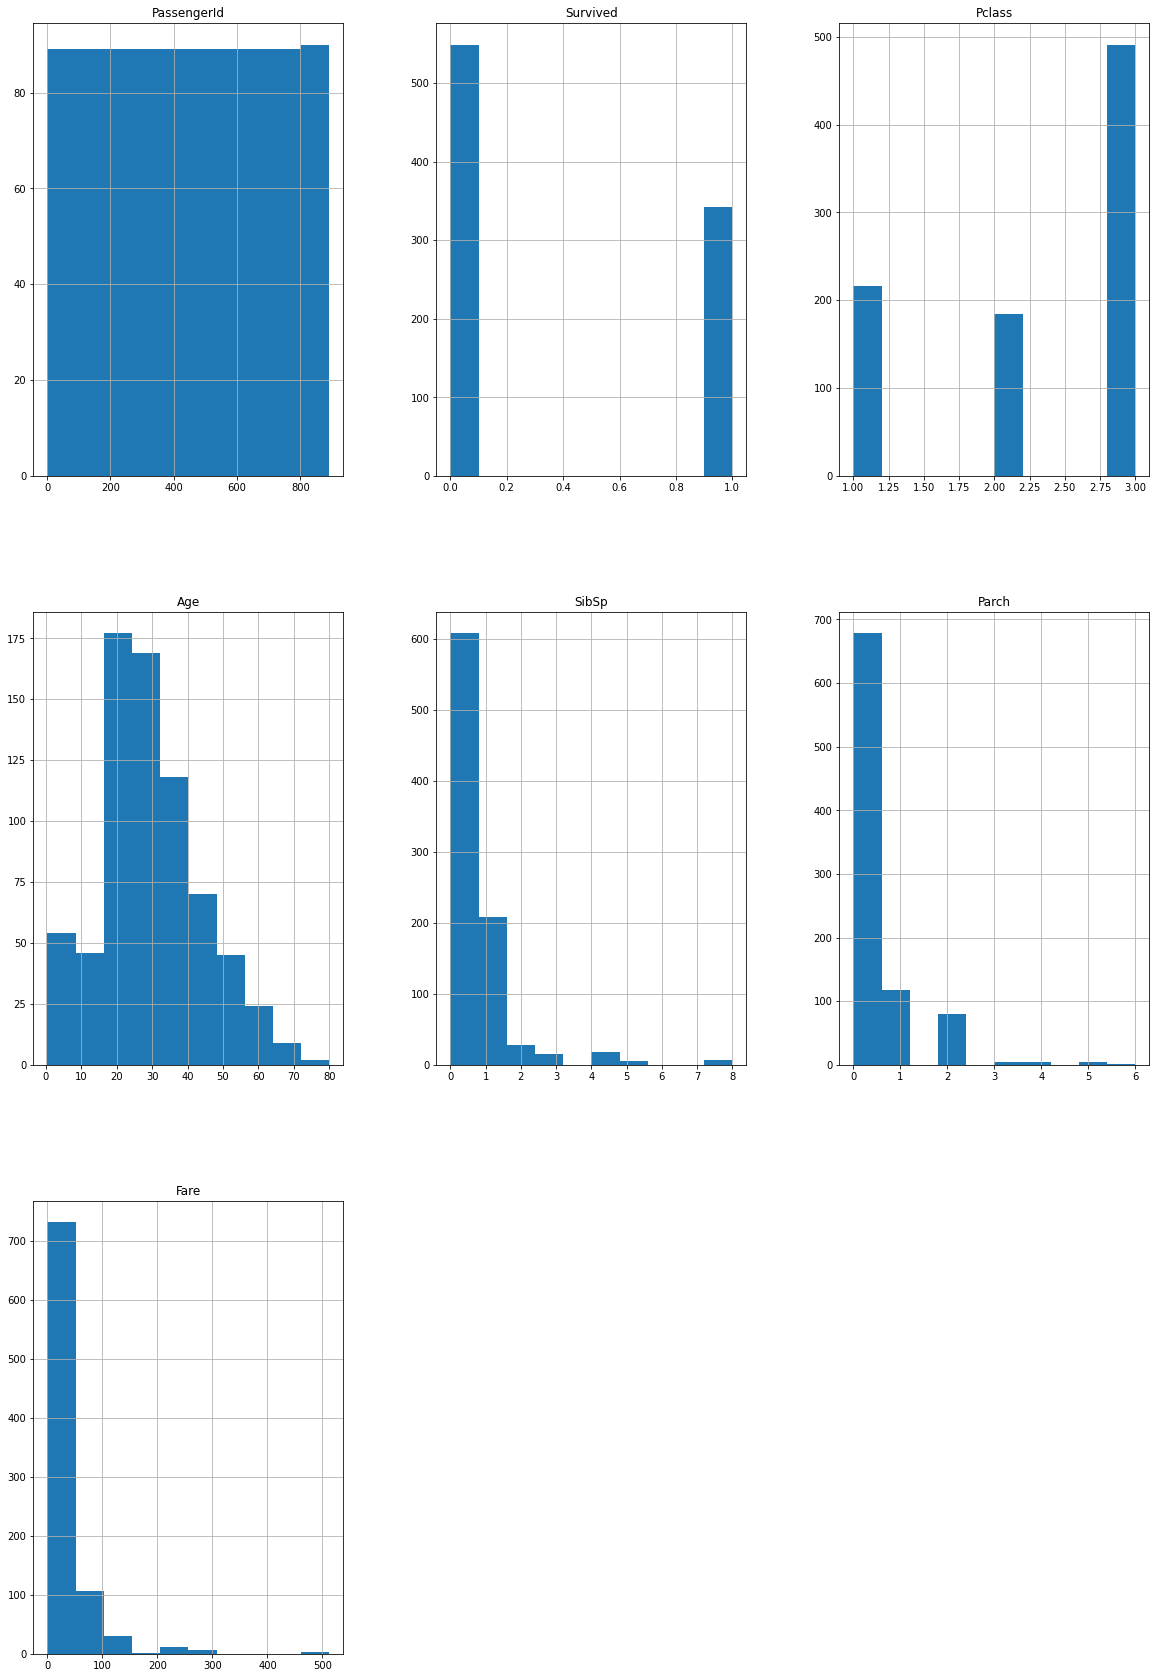

In [13]:
df.hist(figsize=(20,30))

In [14]:
##### Drop the missing values
df=df.dropna()

sns.boxplot(x="Pclass",y="Age",data=df)

In [15]:
#replacing missing values with the mean valuyes 
mean1=df['Age'].mean()
df['Age']=df['Age'].replace(np.nan,mean1)

In [16]:
#replacing mode values with the mode 
mode1=df['Embarked'].mode().values[0]
df['Embarked']=df['Embarked'].replace(np.nan,mode1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [18]:
df=df.drop(['PassengerId','Name',"Ticket","Fare","Cabin"],axis=1)

In [19]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
1,1,1,female,38.0,1,0,C
3,1,1,female,35.0,1,0,S
6,0,1,male,54.0,0,0,S
10,1,3,female,4.0,1,1,S
11,1,1,female,58.0,0,0,S
...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,S
872,0,1,male,33.0,0,0,S
879,1,1,female,56.0,0,1,C
887,1,1,female,19.0,0,0,S


In [20]:
df=pd.get_dummies(columns=["Sex","Embarked","Pclass"],data=df)
df

,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
1,1,38.0,1,0,1,0,1,0,0,1,0,0
3,1,35.0,1,0,1,0,0,0,1,1,0,0
6,0,54.0,0,0,0,1,0,0,1,1,0,0
10,1,4.0,1,1,1,0,0,0,1,0,0,1
11,1,58.0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,1,0,0,0,1,1,0,0
872,0,33.0,0,0,0,1,0,0,1,1,0,0
879,1,56.0,0,1,1,0,1,0,0,1,0,0
887,1,19.0,0,0,1,0,0,0,1,1,0,0


In [21]:
df.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [22]:
df.dtypes

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
dtype: object

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

In [24]:
#x is rest of the survived
#y is the survived targeted value
X=df.drop("Survived",axis=1)
Y=df["Survived"]

In [25]:
#traning and testing split
X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=0.30,random_state=1)

In [26]:
#applying logestic regression model
model_1=LogisticRegression()

In [27]:
model_1.fit(X_train,Y_train)

D:\anaconda\envs\deepl\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [28]:
model_1.score(X_train,Y_train)

0.78125

In [29]:
model_1.score(X_test,Y_test)

0.7454545454545455

In [30]:
predictions=model_1.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.7454545454545455

In [32]:
from sklearn import metrics

In [33]:
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      0.53      0.56        17
           1       0.80      0.84      0.82        38

    accuracy                           0.75        55
   macro avg       0.70      0.69      0.69        55
weighted avg       0.74      0.75      0.74        55



In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predictions)

array([[ 9,  8],
       [ 6, 32]], dtype=int64)

<AxesSubplot:>

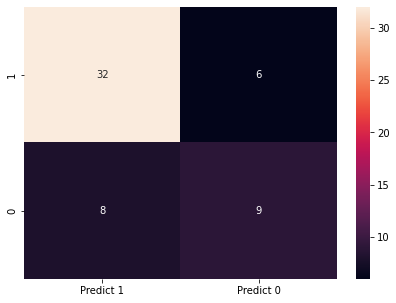

In [35]:
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
#when we work with the decision tree  max depth is for controling the overfitiing
model_2=DecisionTreeClassifier(max_depth=4)
model_2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4)

In [38]:
model_2=DecisionTreeClassifier(max_depth=4)
model_2.fit(X_train,Y_train)

0.84375

In [39]:

model_2.score(X_test,Y_test)

0.7818181818181819

In [40]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier()
model_2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [42]:
model_2.score(X_train,Y_train)

0.984375

In [43]:
model_2.score(X_test,Y_test)

0.7818181818181819

In [45]:
#baggin classifier
#n_estimatore is for creating the mutiple model 
from sklearn.ensemble import BaggingClassifier
model_3=BaggingClassifier(n_estimators=50,base_estimator=model_2)
model_3.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50)